In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2010.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2015.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2011.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2017.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2012.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2013.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2009.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2016.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2018.csv
/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2014.csv


# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# Reading Dataset using Pandas

In [3]:
data = pd.read_csv('/kaggle/input/airline-delay-and-cancellation-data-2009-2018/2018.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [5]:
data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isna().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [7]:
data.fillna(0,inplace=True)

In [8]:
data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Median
data['LATE_AIRCRAFT_DELAY'].median()

0.0

In [10]:
# Mean
data['LATE_AIRCRAFT_DELAY'].mean()

4.808944019266242

In [11]:
# Mode
data['LATE_AIRCRAFT_DELAY'].mode()

0    0.0
dtype: float64

[]

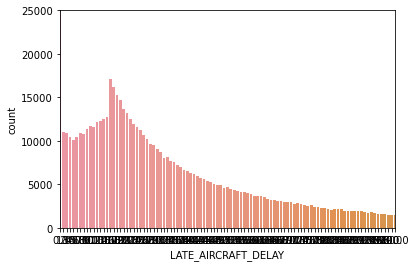

In [12]:
ax = sns.countplot(x="LATE_AIRCRAFT_DELAY", data=data)
ax.set_xlim(0,10**2)
ax.set_ylim(0,25000)
plt.plot()

In [13]:
# Standard Deviation
data['LATE_AIRCRAFT_DELAY'].std()

23.770544791012703

In [14]:
data['LATE_AIRCRAFT_DELAY'].var()

565.0387996615411

In [15]:
LATE_AIRCRAFT_DELAY = data[data['LATE_AIRCRAFT_DELAY'].notna()]['LATE_AIRCRAFT_DELAY']
print(LATE_AIRCRAFT_DELAY)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
7213441    0.0
7213442    0.0
7213443    0.0
7213444    0.0
7213445    0.0
Name: LATE_AIRCRAFT_DELAY, Length: 7213446, dtype: float64


# Use of Z Score

Find Outliers sum of zscore = 0 for normal

-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
-0.20230686317928667
2.4059633655578763
-9.076407041119783e-06
2543


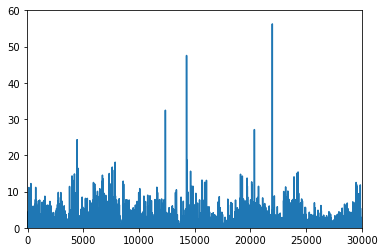

In [16]:
from scipy import stats
zscore = stats.zscore(LATE_AIRCRAFT_DELAY, nan_policy='omit')
for i in range(0,15):
    print(zscore[i])

cnt=0
print(sum(zscore))
for i in zscore:
  if i>15:
    cnt+=1
print(cnt)

plt.axis([-50,30000,0,60])
plt.plot(zscore)
plt.show()

In [17]:
pdf = stats.norm.pdf(zscore)
print(len(pdf))
for i in range(0,15):
    print(pdf[i])

7213446
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.3908612791816585
0.0220759082081148


In [18]:
cdf = stats.norm.cdf(zscore)
for i in range(0,15):
    print(cdf[i])

0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.41983841743442113
0.991935058940042


# Shapiro Test

In [19]:
from scipy.stats import shapiro
stat, p = shapiro(LATE_AIRCRAFT_DELAY)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.206, p=0.000
Probably not Gaussian


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Hypothesis Testing

Interpretation

H0: the two samples are independent. H1: there is a dependency between the samples.

# Normal Test

In [20]:
from scipy.stats import normaltest
stat, p = normaltest(LATE_AIRCRAFT_DELAY)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=12278432.814, p=0.000
Probably not Gaussian


In [21]:
from scipy.stats import pearsonr
data["WHEELS_ON"].fillna(-1000000, inplace = True)
data["WHEELS_OFF"].fillna(1000000, inplace = True) 
stat, p = pearsonr(data['WHEELS_OFF'], data['WHEELS_ON'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.713, p=0.000
Probably dependent


# Conclusion
Poissons process, exponential, but poisson distributed within a certain interval. May not be a true poisson process, but roughly modelled to be one.

MM1 Queueing System confirmed.

# Histogram plots

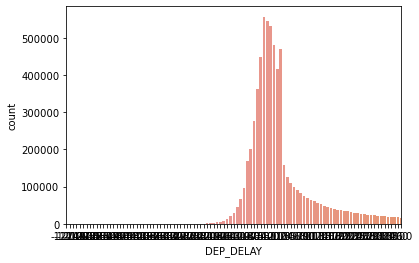

In [22]:
sns.countplot(data['DEP_DELAY'])
plt.xlim(0,100)
plt.show()

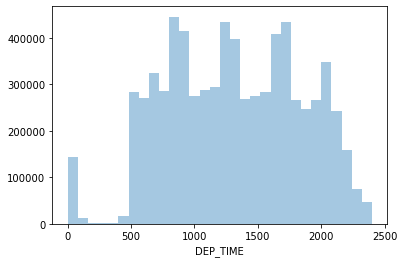

In [23]:
sns.distplot(data['DEP_TIME'],kde=False,bins=30)

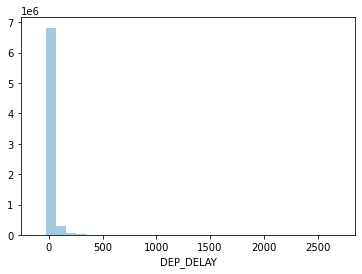

In [24]:
sns.distplot(data['DEP_DELAY'],kde=False,bins=30)

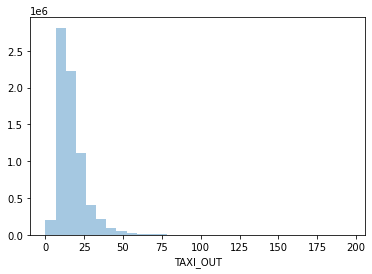

In [25]:
sns.distplot(data['TAXI_OUT'],kde=False,bins=30)

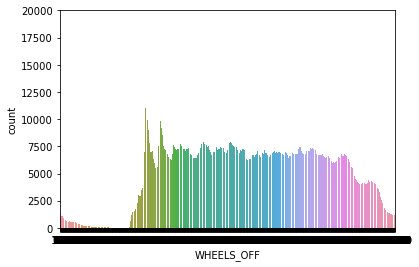

In [26]:
sns.countplot(data['WHEELS_OFF'])
plt.ylim([0,20000])
plt.show()

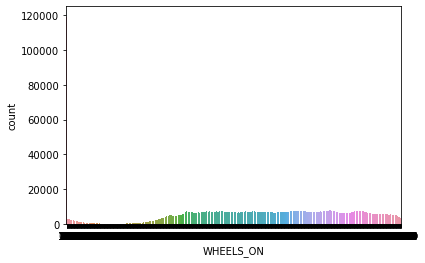

In [27]:
sns.countplot(data['WHEELS_ON'])

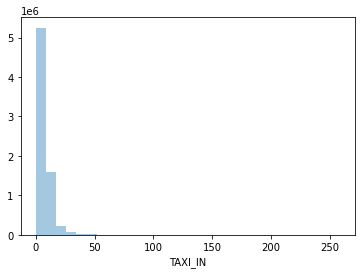

In [28]:
sns.distplot(data['TAXI_IN'],kde=False,bins=30)

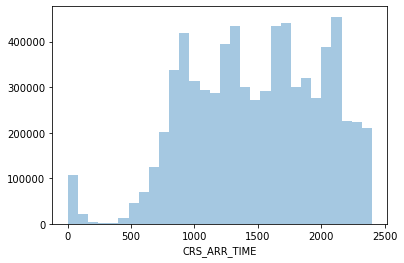

In [29]:
sns.distplot(data['CRS_ARR_TIME'],kde=False,bins=30)

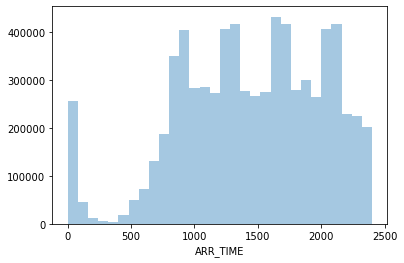

In [30]:
sns.distplot(data['ARR_TIME'],kde=False,bins=30)

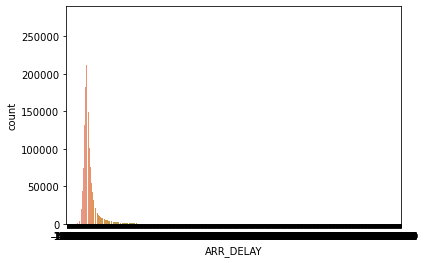

In [31]:
sns.countplot(data['ARR_DELAY'])
plt.show()

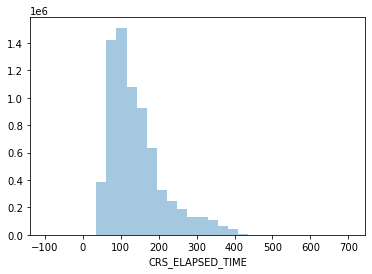

In [32]:
sns.distplot(data['CRS_ELAPSED_TIME'],kde=False,bins=30)

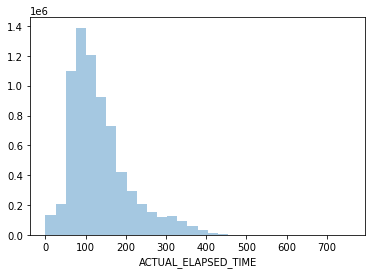

In [33]:
sns.distplot(data['ACTUAL_ELAPSED_TIME'],kde=False,bins=30)

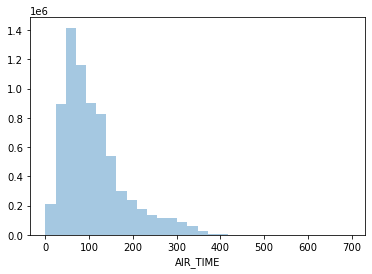

In [34]:
sns.distplot(data['AIR_TIME'],kde=False,bins=30)

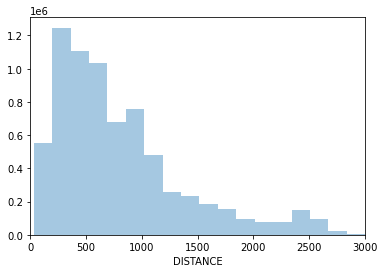

In [35]:
sns.distplot(data['DISTANCE'],kde=False,bins=30)
plt.xlim(0,3000)
plt.show()

## Boxplot b/w DELAY_LEVEL and DEP_DELAY

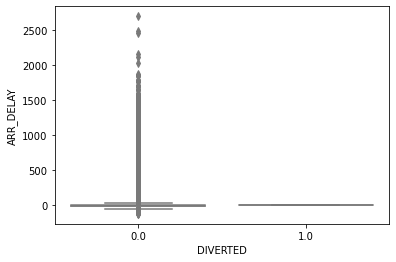

In [36]:
sns.boxplot(x="DIVERTED", y="ARR_DELAY", data=data, palette="coolwarm")

## An analysis between Departure delay and Origin airport

In [37]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
data['DELAY_LEVEL'] = data['DEP_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(50,500))
ax = sns.countplot(y="ORIGIN", hue='DELAY_LEVEL', data=data)
#________________
plt.setp(ax.get_xticklabels(), fontsize=22, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=22, weight = 'bold', rotation = 0);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

## An analysis between Arrival delay and Destination airport

In [38]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
data['DELAY_LEVEL'] = data['ARR_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(50,500))
ax = sns.countplot(y="DEST", hue='DELAY_LEVEL', data=data)
#________________
plt.setp(ax.get_xticklabels(), fontsize=22, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=22, weight = 'bold', rotation = 0);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

## QQ Plot

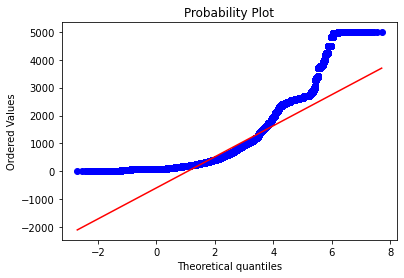

In [39]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(111)
x = data['DISTANCE']
res = stats.probplot(x, dist=stats.norm, sparams=(2.5,), plot=ax)

## Conclusion
Some graphs seem normal, while others exponential.

Need to handle some time series data.

# K's Test

In [40]:
# K-S Test we measure difference in CDF
stats.kstest(data['DISTANCE'], 'norm', alternative='less')

KstestResult(statistic=1.0, pvalue=0.0)

In [41]:
# CRS_ARR_TIME
stats.kstest(data['WHEELS_OFF'], 'norm', alternative='less')

KstestResult(statistic=0.9834397514318792, pvalue=0.0)

# Pearsons Correlation Coefficient

In [42]:
corr, _ = stats.pearsonr(data['WHEELS_ON'], data['WHEELS_OFF'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.713


In [43]:
corr, _ = stats.pearsonr(data['CRS_ARR_TIME'], data['CRS_DEP_TIME'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.689


In [44]:
pd.set_option('display.max_columns', None)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [46]:
data['OP_CARRIER'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [47]:
data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [48]:
# Quality check
data.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [49]:
data.CANCELLED.sum()

116584.0

In [50]:
data.CANCELLED.unique()

array([0., 1.])

In [51]:
canceled = data[(data['CANCELLED'] > 0)]

In [52]:
canceled.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAY_LEVEL
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,0.0,0.0,0.0,0.0,0.0,0.0,1601,0.0,0.0,1.0,B,0.0,81.0,0.0,0.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0
875,2018-01-01,United Airlines,864,LAS,SFO,1744,0.0,0.0,0.0,0.0,0.0,0.0,1926,0.0,0.0,1.0,A,0.0,102.0,0.0,0.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,0.0,0.0,0.0,0.0,0.0,0.0,1844,0.0,0.0,1.0,B,0.0,78.0,0.0,0.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Conclusion
- Canceled flights are not delayed flights
- If canceled, the flight didn't happen, and values are NaN
- We can filter out **Canceled Flights** for out analysis
- DEP_DELAY Actual Departure Time
- ARR_DELAY Total Delay on Arrival in minutes
- If both of these numbers are negative =>> there was no delay

- If a number is positive = flight delayed
- Since that we're exploring only delayed flights, non-delayed should be disregarded
- The danger of keeping those is if we summarise for plotting for example, we'll get false data
- Sum of Delayed minutes will be less because of the negative numbers that will subtract the real delays

**BUT**

- Let's first define what a delayed flight is:
- A Delayed flight is a flight that arrives late at its destination
- Flight can be delayed on departure but still, arrive on time = not a delayed flight

In [53]:
pd.to_datetime(data.FL_DATE)
data['FL_DATE_month'] = pd.to_datetime(data['FL_DATE']).dt.month

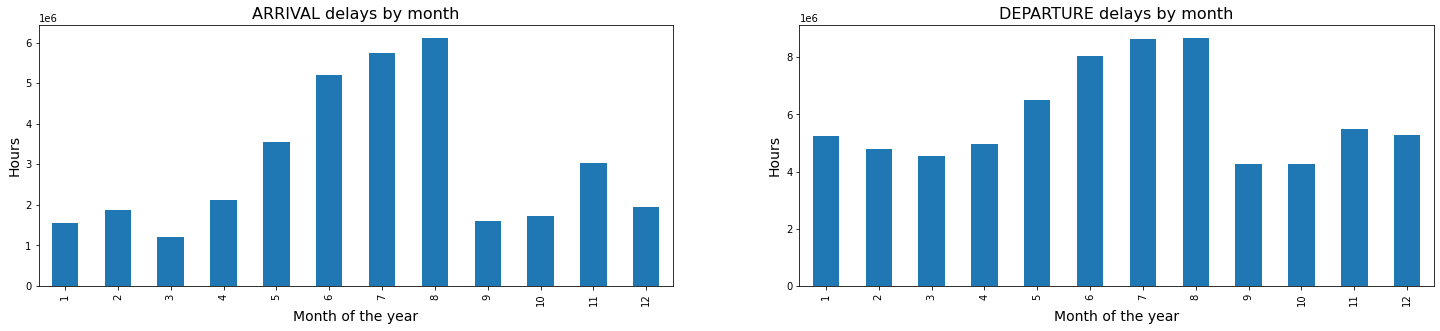

In [54]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
data.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
data.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

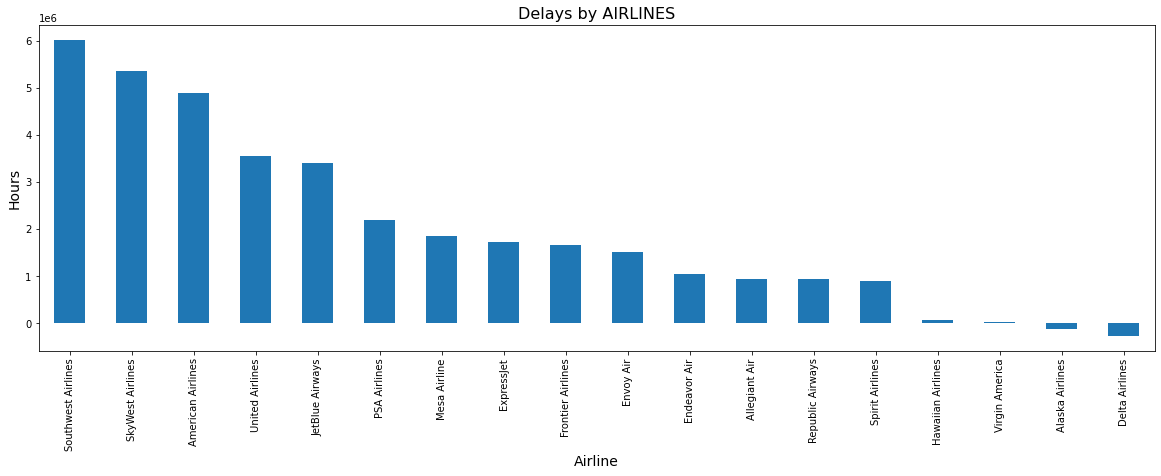

In [55]:
plt.figure(figsize=(20, 6))
data.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

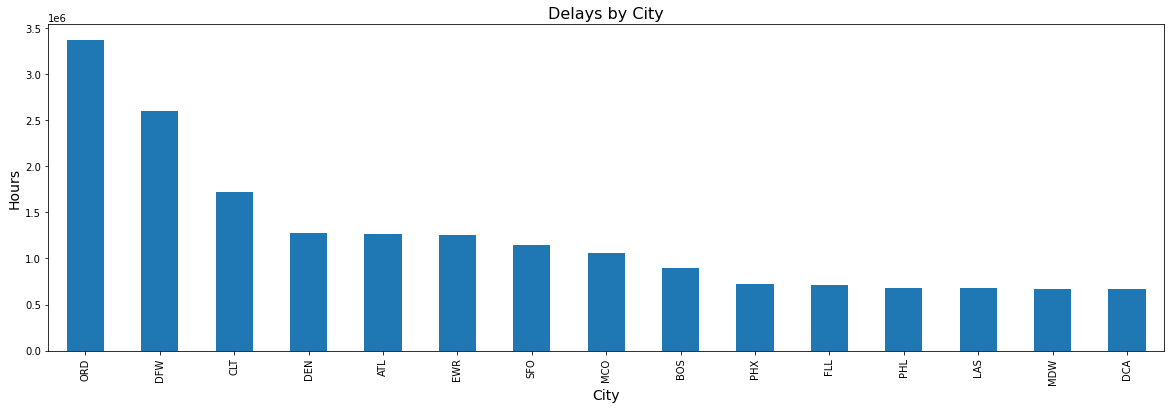

In [56]:
city_by_delay = data.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

In [57]:
data.head(5)
data.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAY_LEVEL,FL_DATE_month
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12
7213445,2018-12-31,American Airlines,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,0,0.0,71.0,59.0,44.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12


In [58]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [59]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

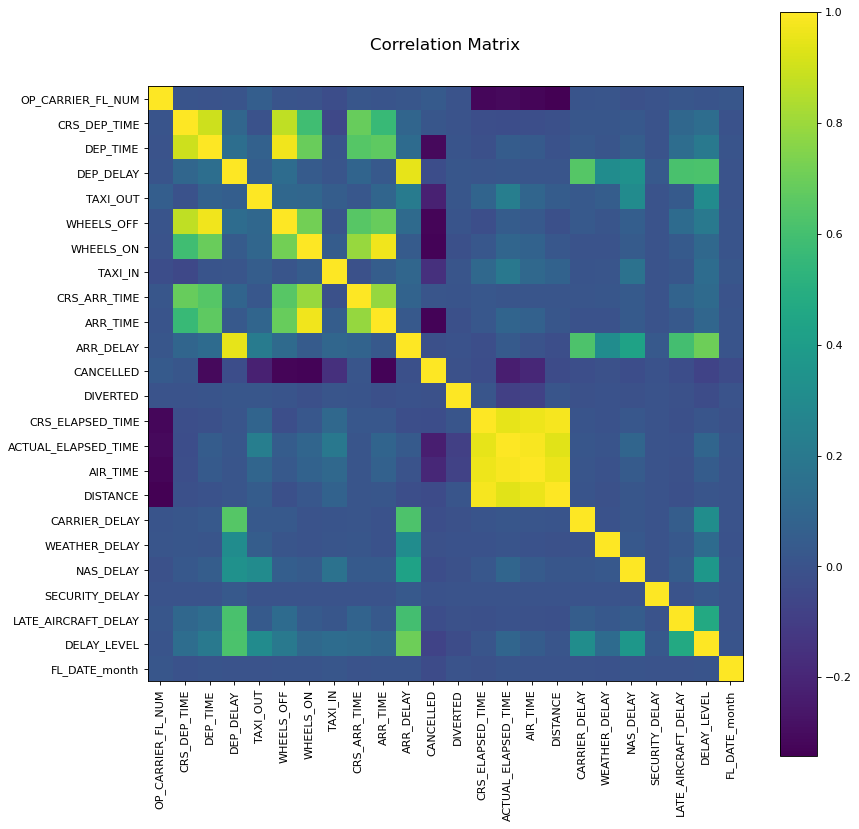

In [60]:
plotCorrelationMatrix(data,12)

In [61]:
data.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DELAY_LEVEL,FL_DATE_month
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


> **This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers.** Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

In [62]:
from sklearn.linear_model import LogisticRegression
X = data['WHEELS_ON'].to_numpy().reshape(-1,1)
y = data['CANCELLED'].to_numpy().reshape(-1,1)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.score(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9996309669470043

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = data['CRS_DEP_TIME'].to_numpy().reshape(-1,1)
y = data['CRS_ARR_TIME'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.474640961748771

In [64]:
reg.coef_

array([[0.72736585]])

In [65]:
import numpy as np
from sklearn.linear_model import Ridge

y = data['DEP_DELAY'].to_numpy().reshape(-1,1)
X = pd.concat([data['ARR_DELAY'], data['WEATHER_DELAY'],data['NAS_DELAY'], data['SECURITY_DELAY'], data['LATE_AIRCRAFT_DELAY']],axis=1).to_numpy()
reg = Ridge(alpha=1).fit(X, y)
reg.score(X, y)

0.9134036567816807

In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression

y = data['DISTANCE'].to_numpy().reshape(-1,1)
X = pd.concat([data['AIR_TIME'], data['ACTUAL_ELAPSED_TIME'],data['CRS_ELAPSED_TIME'], data['SECURITY_DELAY'], data['LATE_AIRCRAFT_DELAY'], data['OP_CARRIER_FL_NUM']],axis=1).to_numpy()
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9717486109827851